In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Instructions/Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [68]:
# Find the most recent date in the data set.
latest_date = session.query(Measurements.date).group_by(Measurements.date).order_by(desc("date")).first()
latest_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

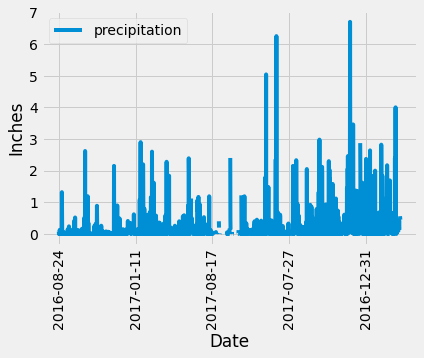

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_12months = dt.date(2017,8,23) - dt.timedelta(days = 365)
latest_12months
# Perform a query to retrieve the data and precipitation scores
latest_data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > latest_12months).all()
latest_data
# Save the query results as a Pandas DataFrame and set the index to the date column
latest_data_df = pd.DataFrame(latest_data, columns = ["date", "precipitation"])
latest_data_df

# Sort the dataframe by date
latest_data_pd = latest_data_pd.sort_values("date")
# latest_data_pd = latest_data_pd.set_index('date')
latest_data_df
# Use Pandas Plotting with Matplotlib to plot the data
latest_data_df.plot(x="date", y="precipitation", rot =90)
plt.xlabel('Date')
plt.ylabel('Inches')


In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
latest_data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Stations.station).count()
station_count

9

In [84]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurements.station, func.count(Measurements.station)).\
group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_USC00519281 = session.query(Measurements.station, func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
filter(Measurements.station == "USC00519281").all()

temp_USC00519281

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

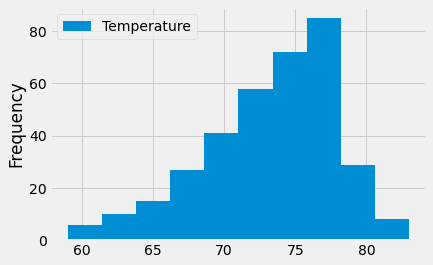

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_12months = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
filter((Measurements.date > latest_12months) & (Measurements.station == "USC00519281")).all()

USC00519281_12months_df = pd.DataFrame(USC00519281_12months, columns = ["Station", "Date", "Temperature"])


USC00519281_12months_df.plot.hist()

# Close session

In [ ]:
# Close Session
session.close()